In [552]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define la ruta a tu archivo CSV original
dir_path = '20250714/nova/'
csv_original = dir_path + 'nova_1903866_metric' + '.csv' # ¡Cambia esto por el nombre de tu archivo!

try:
    df = pd.read_csv(csv_original)
    print(f"Archivo '{csv_original}' cargado exitosamente. Primeras 5 filas:")
    display(df.head())
except FileNotFoundError:
    print(f"Error: El archivo '{csv_original}' no se encontró. Asegúrate de que esté en el mismo directorio o especifica la ruta completa.")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

Archivo '20250714/nova/nova_1903866_metric.csv' cargado exitosamente. Primeras 5 filas:


,timestamp,device_id,metric_id,value
0,2025-07-12T09:19:07+02:00,nova-7,wattmetre_power_watt,73.080952
1,2025-07-12T09:19:08+02:00,nova-7,wattmetre_power_watt,74.538095
2,2025-07-12T09:19:09+02:00,nova-7,wattmetre_power_watt,74.417500
3,2025-07-12T09:19:10+02:00,nova-7,wattmetre_power_watt,73.881818
4,2025-07-12T09:19:11+02:00,nova-7,wattmetre_power_watt,73.413636


In [554]:
# Asegurarse de que la columna 'timestamp' sea tipo datetime
if 'timestamp' in df.columns:
    try:
        # Opción 1: Usar format='ISO8601' (recomendado si todos tus timestamps son ISO8601)
        # Esto es robusto para variaciones como la presencia/ausencia de microsegundos o 'Z' para UTC.
        df['timestamp'] = pd.to_datetime(df['timestamp'], format='ISO8601')
        
        # Opción 2: Especificar el formato exacto incluyendo microsegundos (%f)
        # df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%dT%H:%M:%S.%f%z")

        # Opción 3: Usar format='mixed' (bueno si tienes formatos ligeramente inconsistentes)
        # df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed', infer_datetime_format=True)

        print("\nColumna 'timestamp' convertida a formato de fecha y hora. Tipo de dato actualizado:")
        print(df['timestamp'].dtype)
        print("\nRango de tiempo del CSV original:")
        print(f"Inicio: {df['timestamp'].min()}")
        print(f"Fin: {df['timestamp'].max()}")

    except ValueError as e:
        print(f"\nError al convertir la columna 'timestamp': {e}")
        print("Asegúrate de que el formato de tus fechas sea consistente o prueba con 'format='mixed''.")
        # Si la conversión falla, 'timestamp' podría no haberse convertido.
        # Considera cómo manejar esto, quizás eliminando la columna o usando un valor por defecto.
    except Exception as e:
        print(f"\nOcurrió un error inesperado al procesar la columna 'timestamp': {e}")
else:
    print("\nAdvertencia: La columna 'timestamp' no se encontró en el CSV.")
    # Considera qué columna usar como referencia de tiempo si 'timestamp' no existe.
    # Por ejemplo, si hay una columna 'fecha_hora', podrías usarla en su lugar.


Columna 'timestamp' convertida a formato de fecha y hora. Tipo de dato actualizado:
datetime64[ns, UTC+02:00]

Rango de tiempo del CSV original:
Inicio: 2025-07-12 09:19:07+02:00
Fin: 2025-07-12 11:04:16+02:00


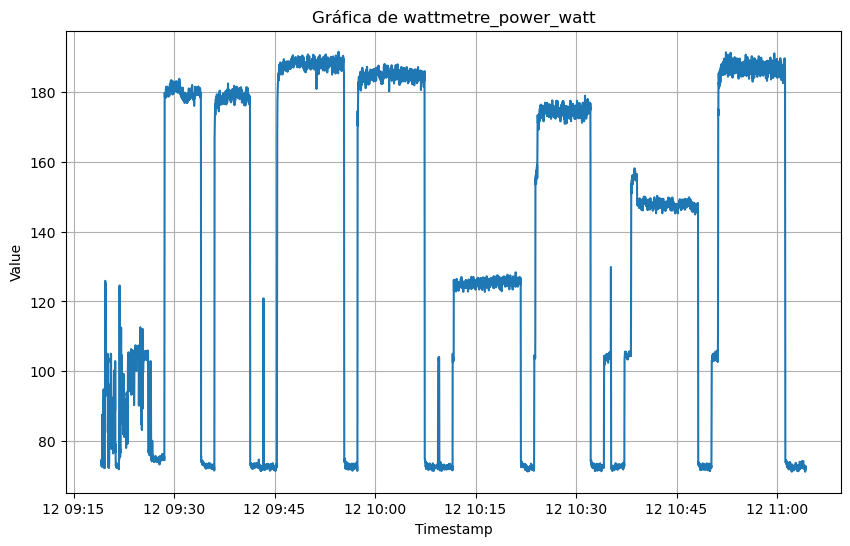

In [556]:
# Lista de las metric_id que quieres graficar
#metricas_a_graficar = ['wattmetre_power_watt', 'bmc_node_power_watt', 'prom_node_load1']
#metricas_a_graficar = ['wattmetre_power_watt', 'prom_node_load1']
metricas_a_graficar = ['wattmetre_power_watt']

# Iterar sobre cada métrica y crear un gráfico
for metrica in metricas_a_graficar:
    # Filtrar el DataFrame para la métrica actual
    df_filtrado = df[df['metric_id'] == metrica].copy()

    # Asegurarse de que 'timestamp' sea de tipo datetime (si no lo es)
    if not pd.api.types.is_datetime64_any_dtype(df_filtrado['timestamp']):
        df_filtrado.loc[:, 'timestamp'] = pd.to_datetime(df_filtrado['timestamp'])

    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtrado['timestamp'], df_filtrado['value'])
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title(f'Gráfica de {metrica}')
    plt.grid(True)
    plt.show()

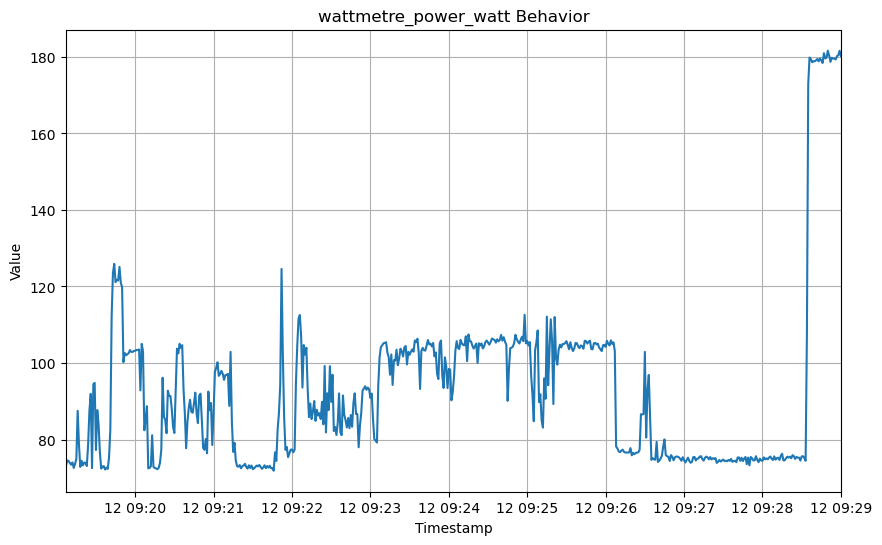

In [560]:
# --- Parámetros de recorte ---
# Define tu tiempo inicial y final para el recorte
# El formato debe coincidir con el de tu columna 'timestamp' (ej: 'YYYY-MM-DD HH:MM:SS')
# Define el rango de tiempo que deseas mostrar (formato 'YYYY-MM-DD HH:MM:SS+HH:MM')
fecha_inicio, fecha_fin = '2025-07-12 09:19:07+02:00','2025-07-12 09:29:00+02:00'

# Convertir las fechas a objetos datetime de pandas
inicio_rango = pd.to_datetime(fecha_inicio)
fin_rango = pd.to_datetime(fecha_fin)

# Iterar sobre cada métrica y crear un gráfico con el rango de tiempo
for metrica in metricas_a_graficar:
    # Filtrar el DataFrame para la métrica actual
    df_filtrado = df[df['metric_id'] == metrica].copy()

    # Asegurarse de que 'timestamp' sea de tipo datetime
    if not pd.api.types.is_datetime64_any_dtype(df_filtrado['timestamp']):
        df_filtrado.loc[:, 'timestamp'] = pd.to_datetime(df_filtrado['timestamp'])

    # Filtrar el DataFrame por el rango de tiempo
    df_filtrado_rango = df_filtrado[(df_filtrado['timestamp'] >= inicio_rango) & (df_filtrado['timestamp'] <= fin_rango)]

    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtrado_rango['timestamp'], df_filtrado_rango['value'])
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title(f'{metrica} Behavior')
    plt.xlim(inicio_rango, fin_rango)  # Establecer los límites del eje x
    plt.grid(True)
    plt.show()

In [562]:
# Nombre del archivo CSV de salida
nombre_archivo_salida_csv = dir_path + 'nova_1903866_metric_01_start' + '.csv'

# Define el rango de tiempo para filtrar los datos (formato 'YYYY-MM-DD HH:MM:SS+HH:MM')
fecha_inicio_filtro = fecha_inicio
fecha_fin_filtro = fecha_fin

try:
    # Convertir las fechas de filtro a objetos datetime de pandas
    inicio_filtro = pd.to_datetime(fecha_inicio_filtro)
    fin_filtro = pd.to_datetime(fecha_fin_filtro)
    
    # Filtrar el DataFrame por el rango de tiempo
    df_filtrado_tiempo = df[(df['timestamp'] >= inicio_filtro) & (df['timestamp'] <= fin_filtro)].copy()

    # Resetear el índice del DataFrame filtrado
    df_reset_index = df_filtrado_tiempo.reset_index(drop=True).copy()

    # Renombrar la columna 'timestamp' a 'time'
    df_renombrado = df_reset_index.rename(columns={'timestamp': 'time'}).copy()

    # Asignar el nuevo índice a la columna 'time'
    df_renombrado['time'] = df_renombrado.index

    # Guardar el nuevo DataFrame a un archivo CSV
    df_renombrado.to_csv(nombre_archivo_salida_csv, index=False)

    print(f"Se ha creado el archivo '{nombre_archivo_salida_csv}' con la columna 'time' iniciando en cero y los datos filtrados por el rango de tiempo.")

except ValueError as ve:
    print(f"Error al convertir la columna 'timestamp': {ve}")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

Se ha creado el archivo '20250714/nova/nova_1903866_metric_01_start.csv' con la columna 'time' iniciando en cero y los datos filtrados por el rango de tiempo.
